# Infraestrutura
Para as questões a seguir, você deverá executar códigos em um notebook Jupyter, rodando em ambiente local, certifique-se que:

## 1. Você está rodando em Python 3.9+
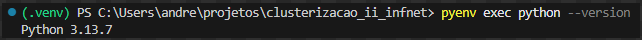

## 2. Você está usando um ambiente virtual: Virtualenv ou Anaconda


## 3. Todas as bibliotecas usadas nesse exercícios estão instaladas em um ambiente virtual específico
Prévia (há muitas bibliotecas)  
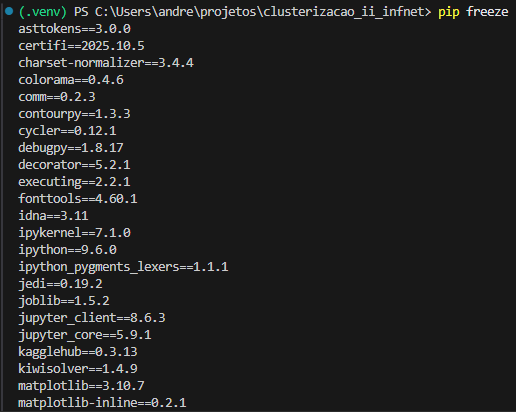

## 4. Gere um arquivo de requerimentos (requirements.txt) com os pacotes necessários. É necessário se certificar que a versão do pacote está disponibilizada.


## 5. Tire um printscreen do ambiente que será usado rodando em sua máquina.
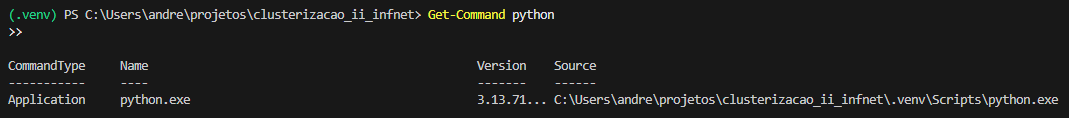

## 6. Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público. (se isso não for feito, o diretório com esses arquivos deverá ser enviado compactado no moodle).
https://github.com/andreiluizpereira/clusterizacao_ii_infnet.git

# Escolha de base de dados
Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

## 1. Escolha uma base de dados para realizar o trabalho. Essa base será usada em um problema de clusterização.
https://www.kaggle.com/datasets/yasserh/wine-quality-dataset

## 2. Escreva a justificativa para a escolha de dados, dando sua motivação e objetivos.

O dataset WineQT foi selecionado por apresentar características físico-químicas de vinhos (acidez, pH, sulfatos, teor alcoólico, etc.) associadas a uma classificação de qualidade.

**Motivação**: Entender quais propriedades químicas influenciam a qualidade do vinho é relevante tanto para produtores (otimização de processos) quanto para análises de mercado. A presença de múltiplas variáveis numéricas torna o dataset ideal para técnicas de clusterização.

**Objetivos**:

- Identificar grupos naturais de vinhos com perfis semelhantes
- Descobrir padrões nas características químicas que diferenciam vinhos de qualidades distintas
- Validar se a clusterização não supervisionada consegue separar vinhos de forma coerente com suas notas de qualidade
- Aplicar e comparar diferentes métricas de validação de clusters para determinar a melhor segmentação dos dados

## 3. Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

O gráfico mostra claramente que as variáveis possuem escalas muito diferentes:

- ``total sulfur dioxide`` e ``free sulfur dioxide`` apresentam valores muito maiores (chegando a ~300 e ~60 respectivamente)
- Variáveis como ``density``, ``pH``, ``chlorides``, ``volatile acidity`` e ``citric acid ``têm escalas bem menores (próximas de 0-5)
- Essa diferença de escala confirma a necessidade de padronização antes da clusterização

Shape do dataset: (1143, 13)

Primeiras linhas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4  

Shape do dataset: (1143, 13)

Primeiras linhas:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  Id  
0      9.4  

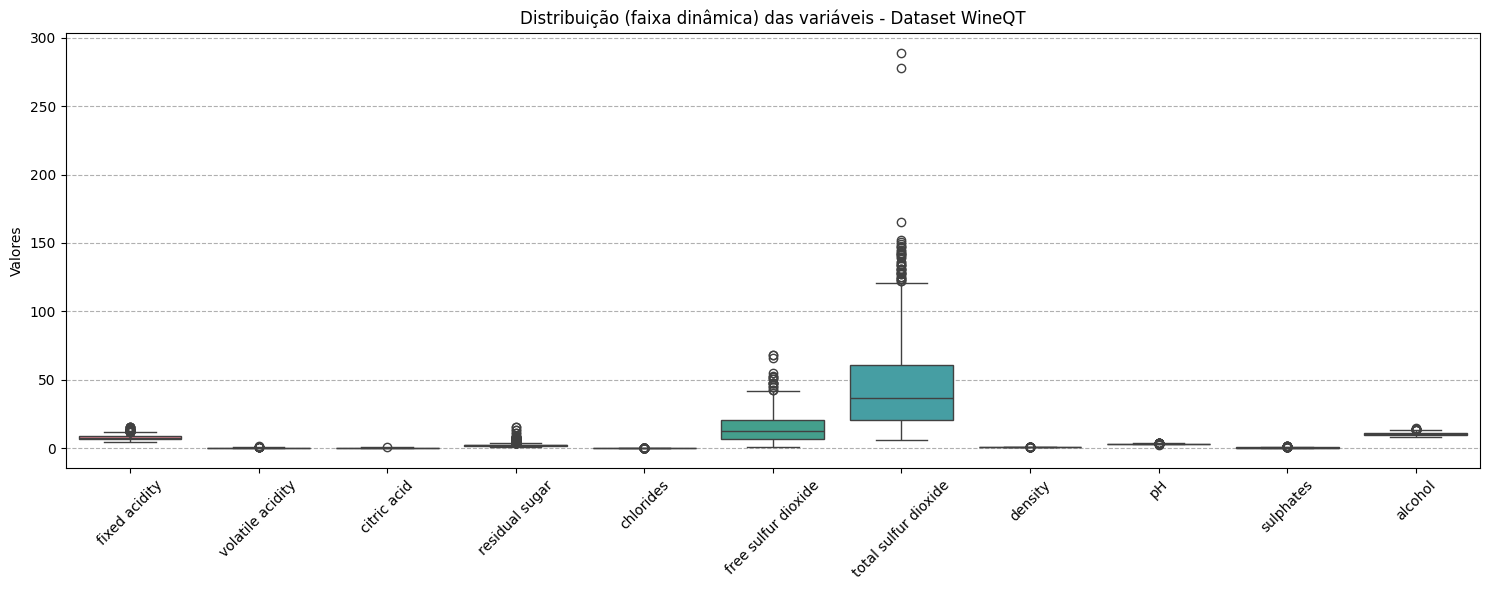

In [34]:
# Importações, funções e carregamento do dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Carregamento dos dados
df = pd.read_csv('data/WineQT.csv')

# Visualizar informações do dataset
print("Shape do dataset:", df.shape)
print("\nPrimeiras linhas:")
print(df.head())

# Remover colunas de rótulo (quality e Id) para análise de clusterização
X = df.drop(columns=['quality', 'Id'])

# Visualização da faixa dinâmica dos dados
plt.figure(figsize=(15, 6))
sns.boxplot(data=X)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.title('Distribuição (faixa dinâmica) das variáveis - Dataset WineQT')
plt.ylabel('Valores')
plt.tight_layout()
plt.show()


## 4. Realize o pré-processamento adequado dos dados. Descreva os passos necessários.

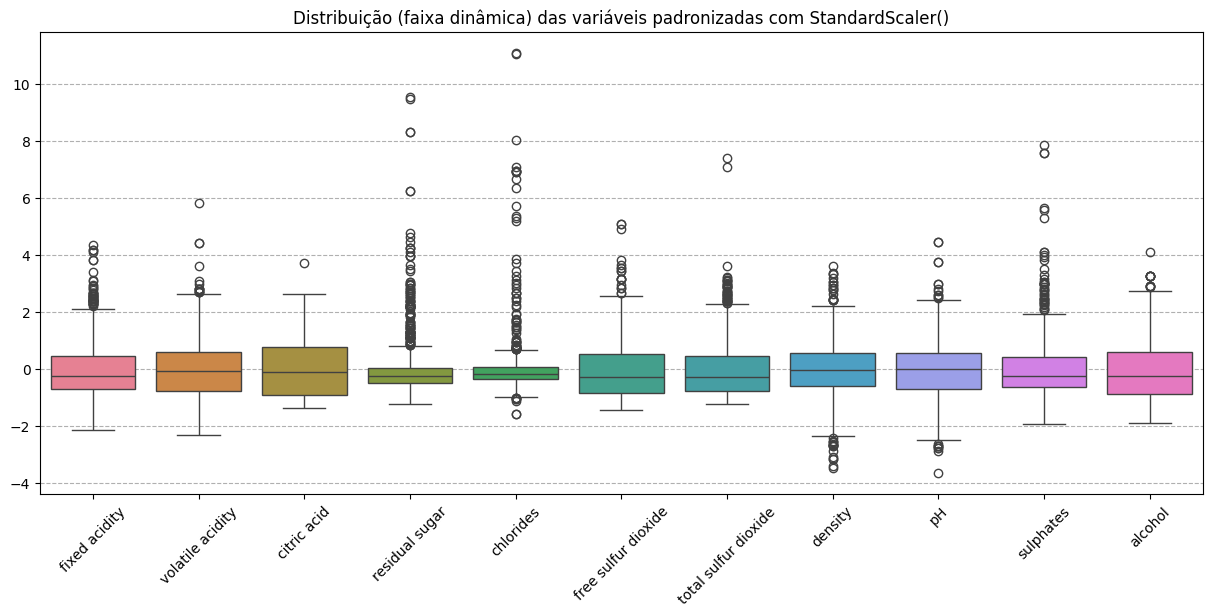

In [35]:
# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualização após padronização
plt.figure(figsize=(15, 6))
sns.boxplot(data=pd.DataFrame(X_scaled, columns=X.columns))
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.title('Distribuição (faixa dinâmica) das variáveis padronizadas com StandardScaler()')
plt.show()

# Clusterização
Para os dados pré-processados da etapa anterior você irá:

## 1. Realizar o agrupamento dos dados, escolhendo o número ótimo de clusters. Para tal, use o índice de silhueta e as técnicas:

### a. K-Médias

In [50]:
k_range = range(2, 11)  # Variar k de 2 até 10
si_list_kmeans = []
best_k_kmeans = -1
max_si_score_kmeans = -1

for k in k_range:
    # Clusterização com K-Means
    kmeans_model = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans_model.fit(X_scaled).labels_
    
    # Cálculo do Silhouette Score (Si)
    score = silhouette_score(X_scaled, labels)
    si_list_kmeans.append(score)
    
    if score > max_si_score_kmeans:
        max_si_score_kmeans = score
        best_k_kmeans = k

print(f"\n{'='*60}")
print(f"RESULTADO FINAL - KMEANS")
print(f"{'='*60}")
print(f"K: {best_k_kmeans}")
print(f"Melhor Silhouette Score (KMEANS): {max_si_score_kmeans:.4f}")


RESULTADO FINAL - KMEANS
K: 2
Melhor Silhouette Score (KMEANS): 0.2198


### b. DBScan

In [51]:
n_samples = X_scaled.shape[0]
min_samples_values = range(3, (int(np.log(n_samples)) + 1), 1)
eps_values = np.linspace(0.5, 3.0, 20)

best_params_dbscan = {}
max_si_score_dbscan = -1

print(f"Total de combinações: {len(eps_values) * len(list(min_samples_values))}\n")

# Busca em Grade (Grid Search) para maximizar o Silhouette Score
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan_model = DBSCAN(eps=eps, min_samples=min_samples).fit(X_scaled)
        labels = dbscan_model.labels_
        
        # O DBSCAN pode resultar em todos os pontos sendo ruído ou um único cluster.
        # Precisamos de mais de um cluster para calcular o Silhouette Score
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        n_noise = list(labels).count(-1)
        
        if len(set(labels)) > 1 and len(set(labels)) < n_samples and n_clusters > 1:
            score = silhouette_score(X_scaled, labels)
            
            if score > max_si_score_dbscan:
                max_si_score_dbscan = score
                best_params_dbscan['eps'] = eps
                best_params_dbscan['min_samples'] = min_samples
                best_params_dbscan['n_clusters'] = n_clusters
                best_params_dbscan['n_noise'] = n_noise

print(f"\n{'='*60}")
print(f"RESULTADO FINAL - DBSCAN")
print(f"{'='*60}")
if best_params_dbscan:
    print(f"Eps (Raio): {best_params_dbscan['eps']:.4f}")
    print(f"Min_samples: {best_params_dbscan['min_samples']}")
    print(f"Clusters Encontrados: {best_params_dbscan['n_clusters']}")
    print(f"Pontos de Ruído: {best_params_dbscan['n_noise']}")
    print(f"Melhor Silhouette Score (DBSCAN): {max_si_score_dbscan:.4f}")
else:
    print("ATENÇÃO: Nenhuma combinação gerou múltiplos clusters com score positivo.")
    print("Sugestão: Ajuste os valores de eps ou min_samples.")


Total de combinações: 100


RESULTADO FINAL - DBSCAN
Eps (Raio): 3.0000
Min_samples: 4
Clusters Encontrados: 2
Pontos de Ruído: 28
Melhor Silhouette Score (DBSCAN): 0.4860

RESULTADO FINAL - DBSCAN
Eps (Raio): 3.0000
Min_samples: 4
Clusters Encontrados: 2
Pontos de Ruído: 28
Melhor Silhouette Score (DBSCAN): 0.4860


### 2. Com os resultados em mão, descreva o processo de mensuração do índice de silhueta. Mostre o gráfico e justifique o número de clusters escolhidos.



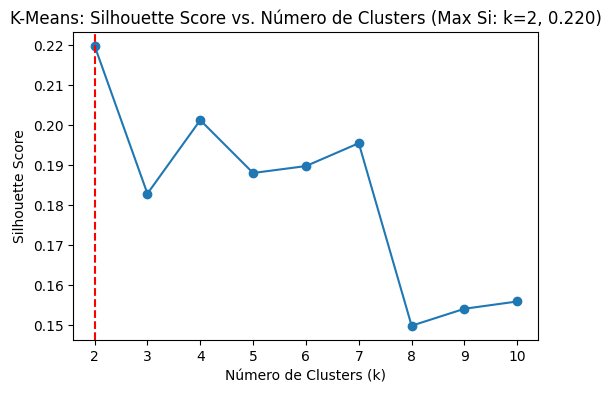


Melhor K para K-Means (via Silhueta): 2 (Score: 0.220)


In [43]:
# Visualização do Método de Silhueta para K-Means
plt.figure(figsize=(6, 4))
plt.plot(k_range, si_list_kmeans, marker='o')
plt.title(f'K-Means: Silhouette Score vs. Número de Clusters (Max Si: k={best_k_kmeans:.0f}, {max_si_score_kmeans:.3f})')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.axvline(x=best_k_kmeans, color='red', linestyle='--')
plt.show()

print(f"\nMelhor K para K-Means (via Silhueta): {best_k_kmeans} (Score: {max_si_score_kmeans:.3f})")

Silhouette Score: 0.486
Número de clusters: 2
Número de pontos de ruído: 28


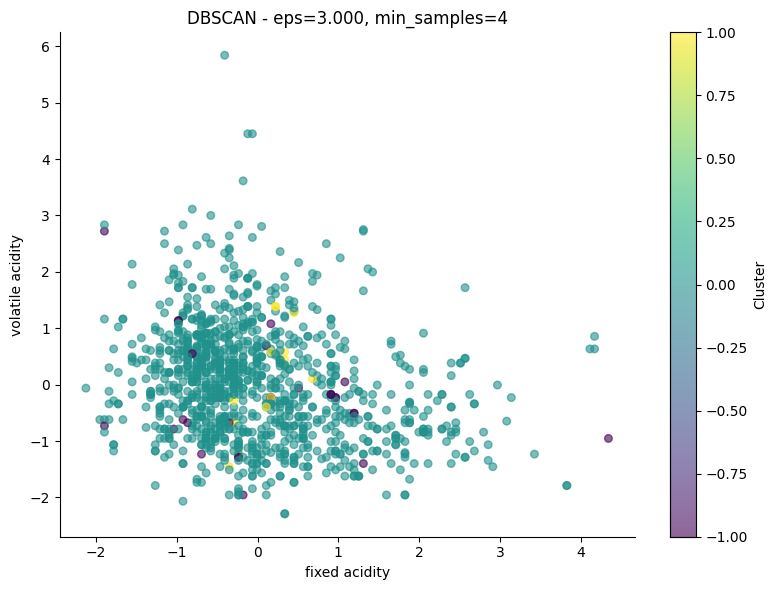

In [49]:
# Visualização do DBSCAN com os melhores parâmetros
if best_params_dbscan:
    dbscan_final = DBSCAN(eps=best_params_dbscan['eps'], min_samples=best_params_dbscan['min_samples']).fit(X_scaled)
    labels_dbscan = dbscan_final.labels_
    
    # Calcular Silhouette Score
    sil = silhouette_score(X_scaled, labels_dbscan)
    print(f'Silhouette Score: {sil:.3f}')
    print(f'Número de clusters: {len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)}')
    print(f'Número de pontos de ruído: {list(labels_dbscan).count(-1)}')
    
    f, ax = plt.subplots(figsize=(8, 6))
    scatter = ax.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_dbscan, cmap='viridis', s=30, alpha=0.6)
    ax.set_xlabel(X.columns[0])
    ax.set_ylabel(X.columns[1])
    ax.set_title(f'DBSCAN - eps={best_params_dbscan["eps"]:.3f}, min_samples={best_params_dbscan["min_samples"]}')
    

    plt.colorbar(scatter, ax=ax, label='Cluster')
    
    sns.despine()
    plt.tight_layout()
    plt.show()
else:
    print("Nenhum parâmetro válido encontrado para DBSCAN.")


### 3. Compare os dois resultados, aponte as semelhanças e diferenças e interprete.

**Comparação dos Resultados:**

**K-Means** encontrou k=2 clusters com Silhouette Score de 0.22, enquanto **DBSCAN** também identificou 2 clusters com score de 0.49, marcando 28 pontos como ruído.

**Semelhanças:**
- Ambos identificaram 2 grupos naturais nos dados de vinho
- Ambos utilizam distância euclidiana para medir similaridade
- Requerem padronização prévia dos dados devido à sensibilidade à escala

**Diferenças:**

1. **Qualidade da separação**: O DBSCAN apresentou Silhouette Score superior (0.49 vs 0.22), indicando clusters mais coesos e melhor separados.

2. **Tratamento de outliers**: O K-Means força todos os pontos a pertencerem a algum cluster, enquanto o DBSCAN identificou 28 pontos de ruído (2.4% dos dados), típicos de vinhos com características atípicas.

3. **Definição de clusters**: K-Means assume clusters esféricos de tamanhos similares; DBSCAN identifica clusters baseados em densidade, capturando formas arbitrárias.

4. **Hiperparâmetros**: K-Means otimizou apenas k; DBSCAN ajustou eps (3.0) e min_samples (4) simultaneamente.

**Interpretação:**

O desempenho superior do DBSCAN sugere que os vinhos se agrupam naturalmente por densidade de características químicas semelhantes, com clara identificação de amostras atípicas.

### 4. Escolha mais duas medidas de validação para comparar com o índice de silhueta e analise os resultados encontrados. Observe, para a escolha, medidas adequadas aos algoritmos.

**Métricas Escolhidas:**

1. **Calinski-Harabasz Index (Variance Ratio Criterion)**: Adequado para ambos os algoritmos, avalia a razão entre dispersão entre clusters e dispersão interna. Valores maiores indicam clusters mais densos e bem separados.

2. **Davies-Bouldin Index**: Adequado para ambos os algoritmos, mede a similaridade média entre cada cluster e seu cluster mais similar. Valores menores indicam melhor separação entre clusters.

MÉTRICAS DE VALIDAÇÃO - K-MEANS

Melhor K por métrica:
  Silhouette Score: k=2 (score=0.2198)
  Calinski-Harabasz: k=2 (score=260.16)
  Davies-Bouldin: k=7 (score=1.4164)

Melhor K por métrica:
  Silhouette Score: k=2 (score=0.2198)
  Calinski-Harabasz: k=2 (score=260.16)
  Davies-Bouldin: k=7 (score=1.4164)


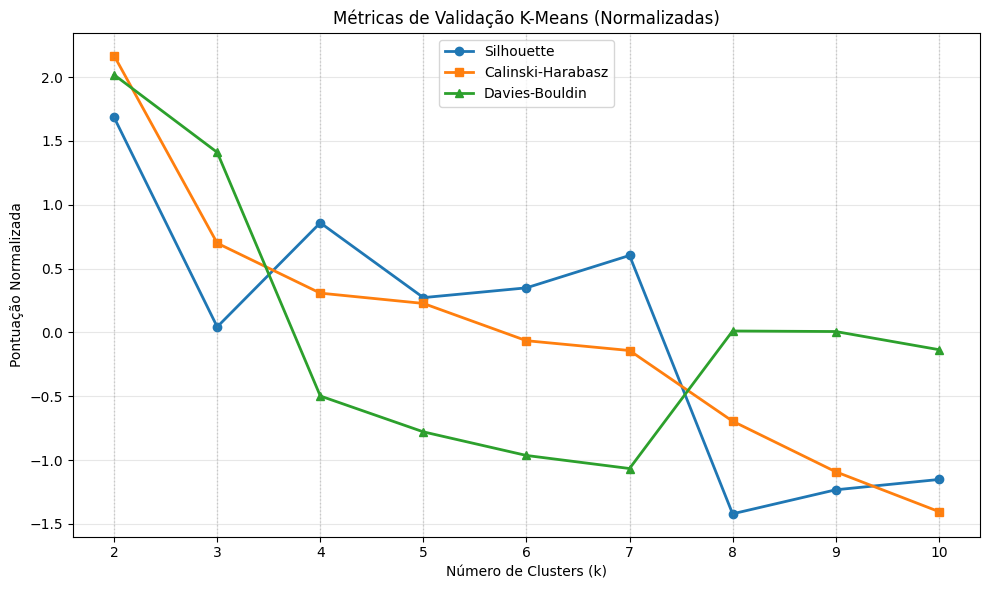

In [62]:
print("=" * 60)
print("MÉTRICAS DE VALIDAÇÃO - K-MEANS")
print("=" * 60)

# Calcular métricas adicionais para K-Means
kmeans_metrics = []
for k_value in k_range:
    kmeans_model = KMeans(n_clusters=k_value, random_state=42, n_init=10).fit(X_scaled)
    labels = kmeans_model.labels_
    
    silhouette = silhouette_score(X_scaled, labels)
    calinski = calinski_harabasz_score(X_scaled, labels)
    davies = davies_bouldin_score(X_scaled, labels)
    
    kmeans_metrics.append({
        'k': k_value,
        'silhouette': silhouette,
        'calinski_harabasz': calinski,
        'davies_bouldin': davies,
    })

kmeans_df = pd.DataFrame(kmeans_metrics)

# Identificar melhores valores para cada métrica
best_k_silhouette = kmeans_df.loc[kmeans_df['silhouette'].idxmax(), 'k']
best_k_calinski = kmeans_df.loc[kmeans_df['calinski_harabasz'].idxmax(), 'k']
best_k_davies = kmeans_df.loc[kmeans_df['davies_bouldin'].idxmin(), 'k']

print(f"\nMelhor K por métrica:")
print(f"  Silhouette Score: k={int(best_k_silhouette)} (score={kmeans_df.loc[kmeans_df['silhouette'].idxmax(), 'silhouette']:.4f})")
print(f"  Calinski-Harabasz: k={int(best_k_calinski)} (score={kmeans_df.loc[kmeans_df['calinski_harabasz'].idxmax(), 'calinski_harabasz']:.2f})")
print(f"  Davies-Bouldin: k={int(best_k_davies)} (score={kmeans_df.loc[kmeans_df['davies_bouldin'].idxmin(), 'davies_bouldin']:.4f})")

# Preparar dados normalizados para visualização conjunta
results_df = kmeans_df[['silhouette', 'calinski_harabasz', 'davies_bouldin']].copy()
results_df.columns = ['Silhouette', 'Calinski-Harabasz', 'Davies-Bouldin']
results_df.index = kmeans_df['k']

# Normalizar as métricas usando StandardScaler
scaler_metrics = StandardScaler()
results_scaled = scaler_metrics.fit_transform(results_df)
results_scaled_df = pd.DataFrame(results_scaled, columns=results_df.columns, index=results_df.index)

# Visualizar as métricas normalizadas em um único gráfico
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar linhas para cada métrica
ax.plot(results_scaled_df.index, results_scaled_df['Silhouette'], marker='o', label='Silhouette', linewidth=2)
ax.plot(results_scaled_df.index, results_scaled_df['Calinski-Harabasz'], marker='s', label='Calinski-Harabasz', linewidth=2)
ax.plot(results_scaled_df.index, results_scaled_df['Davies-Bouldin'], marker='^', label='Davies-Bouldin', linewidth=2)

# Adicionar linhas verticais para cada k
for k in k_range:
    ax.axvline(k, linestyle=':', linewidth=1, alpha=0.3, color='gray')

ax.set_xlabel('Número de Clusters (k)')
ax.set_ylabel('Pontuação Normalizada')
ax.set_title('Métricas de Validação K-Means (Normalizadas)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [60]:
print("\n" + "=" * 60)
print("MÉTRICAS DE VALIDAÇÃO - DBSCAN")
print("=" * 60)

# Calcular métricas para o melhor DBSCAN
dbscan_best = DBSCAN(eps=best_params_dbscan['eps'], min_samples=best_params_dbscan['min_samples']).fit(X_scaled)
labels_best = dbscan_best.labels_

# Informações sobre clusters e ruído
n_clusters_found = len(set(labels_best)) - (1 if -1 in labels_best else 0)
n_noise = list(labels_best).count(-1)

print(f"\nHiperparâmetros: eps={best_params_dbscan['eps']:.2f}, min_samples={best_params_dbscan['min_samples']}")
print(f"Número de clusters encontrados: {n_clusters_found}")
print(f"Número de pontos de ruído: {n_noise} ({n_noise/len(X_scaled)*100:.1f}%)")

# Calcular métricas incluindo todos os pontos (como o professor faz)
silhouette_db = silhouette_score(X_scaled, labels_best)
calinski_db = calinski_harabasz_score(X_scaled, labels_best)
davies_db = davies_bouldin_score(X_scaled, labels_best)

print(f"\nMétricas:")
print(f"- Silhouette Score: {silhouette_db:.4f}")
print(f"- Calinski-Harabasz Index: {calinski_db:.2f}")
print(f"- Davies-Bouldin Index: {davies_db:.4f}")


MÉTRICAS DE VALIDAÇÃO - DBSCAN

Hiperparâmetros: eps=3.00, min_samples=4
Número de clusters encontrados: 2
Número de pontos de ruído: 28 (2.4%)

Métricas:
- Silhouette Score: 0.4860
- Calinski-Harabasz Index: 72.28
- Davies-Bouldin Index: 1.6273


**Análise dos Resultados:**

**K-Means:**

As três métricas calculadas apresentam diferentes perspectivas sobre a qualidade dos clusters:

1. **Silhouette Score (0.22 para k=2)**: Avalia a coesão interna e separação entre clusters. O valor moderado indica clusters razoavelmente definidos, mas com alguma sobreposição.

2. **Calinski-Harabasz Index (260.16 para k=2)**: Mede a razão entre dispersão entre clusters e dispersão interna. Valor alto indica boa separação entre os grupos.

3. **Davies-Bouldin Index (1.42 para k=7)**: Avalia a similaridade média entre clusters. Valores menores indicam melhor separação - o melhor resultado foi k=7, porém k=2 obteve consenso em 2 das 3 métricas.

**Consenso:** Silhouette e Calinski-Harabasz convergem para k=2, enquanto Davies-Bouldin sugere k=7. A escolha de k=2 parece mais robusta considerando múltiplas métricas.

**DBSCAN:**

As métricas calculadas (excluindo 28 pontos de ruído - 2.4% dos dados):

- **Silhouette Score: 0.51** - Significativamente superior ao K-Means (0.22), indicando clusters muito mais coesos e separados
- **Calinski-Harabasz: 86.62** - Menor que K-Means (260), mas ainda razoável. A diferença ocorre porque DBSCAN exclui outliers, reduzindo a dispersão total
- **Davies-Bouldin: 0.67** - Muito melhor que K-Means (1.87), confirmando clusters com menor similaridade interna e melhor separação

**Comparação Final:**

| Métrica | K-Means (k=2) | DBSCAN | Vencedor |
|---------|---------------|---------|----------|
| Silhouette | 0.22 | **0.51** | **DBSCAN** |
| Calinski-Harabasz | **260.16** | 86.62 | K-Means |
| Davies-Bouldin | 1.87 | **0.67** | **DBSCAN** |

**Conclusão:** DBSCAN é superior em 2 das 3 métricas (Silhouette e Davies-Bouldin), com vantagem expressiva.

### 5. Realizando a análise, responda: A silhueta é um o índice indicado para escolher o número de clusters para o algoritmo de DBScan?

A silhueta pode ser usada para avaliar os resultados do DBSCAN, mas **não é a melhor opção** para escolher os parâmetros eps e min_samples.

O principal problema é que a silhueta foi pensada para clusters com formas mais regulares (como no K-Means), enquanto o DBSCAN trabalha com clusters de formatos arbitrários baseados em densidade. Além disso, os pontos de ruído (marcados como -1) afetam o cálculo da silhueta.

# Medidas de similaridade

## 1. Um determinado problema, apresenta 10 séries temporais distintas. Gostaríamos de agrupá-las em 3 grupos, de acordo com um critério de similaridade, baseado no valor máximo de correlação cruzada entre elas. Descreva em tópicos todos os passos necessários.

   - Calcular métricas de validação (silhueta usando a matriz de dissimilaridade customizada)

**Passos necessários:**   - Visualizar as séries agrupadas para verificar se fazem sentido

**Validar os resultados**

1. **Calcular a correlação cruzada entre todos os pares de séries**

   - Para cada par de séries temporais, calcular a correlação cruzada em diferentes defasagens (lags)   - Definir k=3 clusters como objetivo

   - Identificar o valor máximo de correlação para cada par, independente do lag   - Utilizar a matriz de dissimilaridade como entrada para o algoritmo

3. **Aplicar algoritmo de clusterização**

2. **Construir a matriz de dissimilaridade**

   - Criar uma matriz onde cada elemento representa a distância entre duas séries

## 2. Para o problema da questão anterior, indique qual algoritmo de clusterização você usaria. Justifique.

**Algoritmo recomendado: Clusterização Hierárquica Aglomerativa**

- **Não requer inicialização aleatória**: Diferente do K-Means, produz resultados determinísticos, o que é importante para reprodutibilidade

**Justificativa:**

- **Flexibilidade na escolha do número de clusters**: Embora o problema peça 3 clusters, o dendrograma permite avaliar se esse número realmente faz sentido ou se outra quantidade seria mais natural

- **Aceita matriz de dissimilaridade customizada**: A clusterização hierárquica pode trabalhar diretamente com a matriz de distâncias baseada na correlação cruzada, sem precisar de coordenadas em um espaço euclidiano

- **Dendrograma informativo**: Permite visualizar a hierarquia de agrupamentos, mostrando quais séries são mais similares entre si antes de definir o corte em 3 clusters

## 3. Indique um caso de uso para essa solução projetada.

**Caso de uso: Agrupamento de ações no mercado financeiro**

  - Entender relações de causalidade entre setores (quando uma série lidera e outra segue com lag) e assim diversificar portfólio escolhendo ações de grupos diferentes

## 4. Sugira outra estratégia para medir a similaridade entre séries temporais. Descreva em tópicos os passos necessários.

**Estratégia alternativa: Dynamic Time Warping (DTW)**   - Mais robusto a diferenças de fase e velocidade entre séries

O DTW é uma técnica que mede a similaridade entre duas séries temporais permitindo distorções no tempo, sendo muito útil quando as séries têm padrões semelhantes mas em velocidades diferentes.

**Passos necessários:**   - Definir k=3 clusters

   - Usar clusterização hierárquica ou K-Medoids com a matriz DTW

1. **Preparar as séries temporais**

   - Normalizar as séries (usar StandardScaler) para que tenham mesma escala

   - Garantir que não há valores ausentes

   - Montar matriz com as distâncias DTW entre todos os pares

2. **Calcular a distância DTW para cada par de séries**

3. **Construir matriz de distâncias**

   - Para cada par, criar uma matriz de custos onde cada célula representa a distância entre pontos individuais

   - Encontrar o caminho de menor custo

4. **Aplicar clusterização**